In [33]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import resample
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns

In [34]:
df = pd.read_csv('c:/Users/MSI/MLOps_Project/notebooks/Disease1.csv')

In [35]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   General_Health                50000 non-null  object 
 1   Checkup                       50000 non-null  object 
 2   Exercise                      50000 non-null  object 
 3   Heart_Disease                 50000 non-null  object 
 4   Skin_Cancer                   50000 non-null  object 
 5   Other_Cancer                  50000 non-null  object 
 6   Depression                    50000 non-null  object 
 7   Diabetes                      50000 non-null  object 
 8   Arthritis                     50000 non-null  object 
 9   Sex                           50000 non-null  object 
 10  Age_Category                  50000 non-null  object 
 11  Height_(cm)                   50000 non-null  float64
 12  Weight_(kg)                   50000 non-null  float64
 13  B

# Missing Values

In [37]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

# Outliers

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   General_Health                50000 non-null  object 
 1   Checkup                       50000 non-null  object 
 2   Exercise                      50000 non-null  object 
 3   Heart_Disease                 50000 non-null  object 
 4   Skin_Cancer                   50000 non-null  object 
 5   Other_Cancer                  50000 non-null  object 
 6   Depression                    50000 non-null  object 
 7   Diabetes                      50000 non-null  object 
 8   Arthritis                     50000 non-null  object 
 9   Sex                           50000 non-null  object 
 10  Age_Category                  50000 non-null  object 
 11  Height_(cm)                   50000 non-null  float64
 12  Weight_(kg)                   50000 non-null  float64
 13  B

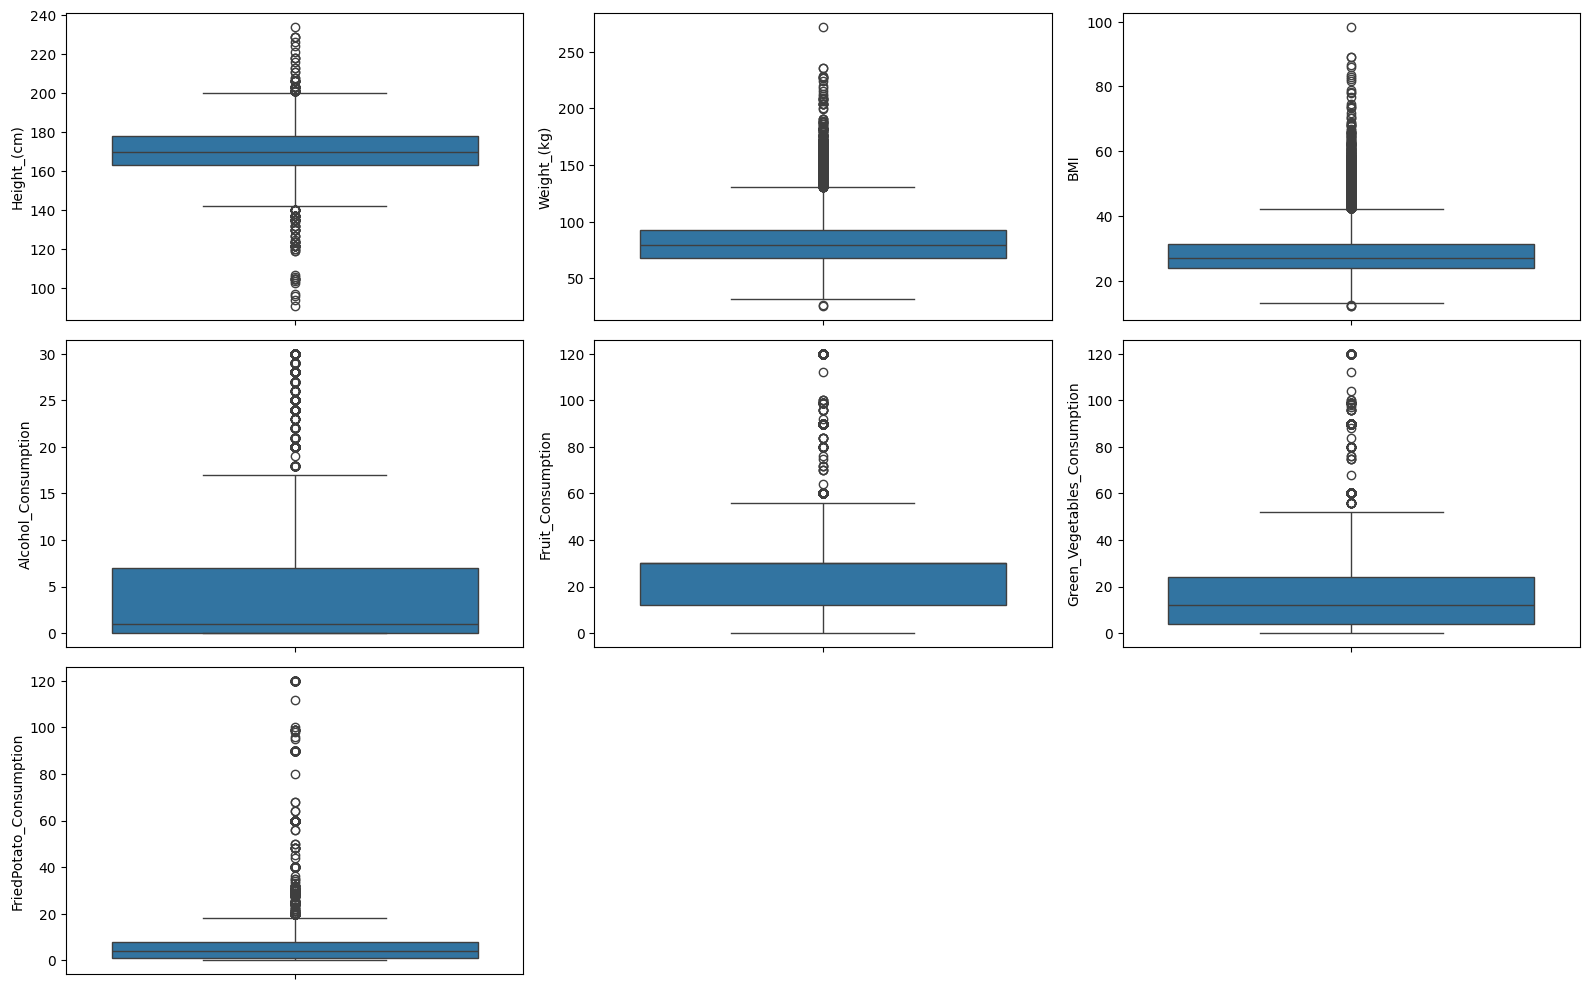

In [39]:
# List of numerical columns
numerical_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
                  'Fruit_Consumption', 'Green_Vegetables_Consumption', 
                  'FriedPotato_Consumption']

# Create box plots
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])

plt.tight_layout()

In [40]:
# Summary statistics
summary_stats = df[numerical_cols].describe()
summary_stats

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,170.302580,81.888519,28.154736,5.311120,30.486840,16.017800,5.949200
std,10.764121,20.651591,6.361491,8.380039,25.326719,15.628798,8.480237
min,91.000000,25.400000,12.160000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,23.780000,0.000000,12.000000,4.000000,1.000000
50%,170.000000,79.380000,27.120000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,92.990000,31.190000,7.000000,30.000000,24.000000,8.000000
max,234.000000,272.160000,98.440000,30.000000,120.000000,120.000000,120.000000


In [41]:
df.describe()


,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,170.302580,81.888519,28.154736,5.311120,30.486840,16.017800,5.949200
std,10.764121,20.651591,6.361491,8.380039,25.326719,15.628798,8.480237
min,91.000000,25.400000,12.160000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,23.780000,0.000000,12.000000,4.000000,1.000000
50%,170.000000,79.380000,27.120000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,92.990000,31.190000,7.000000,30.000000,24.000000,8.000000
max,234.000000,272.160000,98.440000,30.000000,120.000000,120.000000,120.000000


# Duplicates

In [42]:
# Count duplicates
duplicate_count = df.duplicated().sum()
print("Number of duplicates:", duplicate_count)

Number of duplicates: 2


In [43]:
# Remove duplicate rows
df= df.drop_duplicates()

# DATA PREPARATION

In [44]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : General_Health Checkup Exercise Heart_Disease Skin_Cancer Other_Cancer Depression Diabetes Arthritis Sex Smoking_History
Numerical Features : Age_Category Height_(cm) Weight_(kg) BMI Alcohol_Consumption Fruit_Consumption Green_Vegetables_Consumption FriedPotato_Consumption


# Feature Preprocessing

In [45]:
def preprocess_health_data(df):
    # Mapping for Diabetes
    diabetes_mapping = {
        'No': 0, 
        'No, pre-diabetes or borderline diabetes': 0, 
        'Yes, but female told only during pregnancy': 1,
        'Yes': 1
    }
    df['Diabetes'] = df['Diabetes'].map(diabetes_mapping)

    # Encoding Sex: 0 for female, 1 for male
    df['Sex'] = df['Sex'].astype(str).str.strip()

    df['Sex'] = df['Sex'].map({'Female': 0, 'Male': 1})
    # Convert remaining categorical variables with "Yes" and "No" values to binary format for correlation computation
    binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History', 'Exercise']
    
    for column in binary_columns:
        df[column] = df[column].map({'Yes': 1, 'No': 0})

    # Ordinal encoding for General_Health, Age_Category, BMI_Category
    general_health_mapping = {
        'Poor': 0,
        'Fair': 1,
        'Good': 2,
        'Very Good': 3,
        'Excellent': 4
    }
    df['General_Health'] = df['General_Health'].map(general_health_mapping)

   

    age_category_mapping = {
        '18-24': 0,
        '25-29': 1,
        '30-34': 2,
        '35-39': 3,
        '40-44': 4,
        '45-49': 5,
        '50-54': 6,
        '55-59': 7,
        '60-64': 8,
        '65-69': 9,
        '70-74': 10,
        '75-79': 11,
        '80+': 12
    }
    df['Age_Category'] = df['Age_Category'].map(age_category_mapping)
     # Ordinal encoding for Checkup
    checkup_mapping = {
        'Never': 0,
        '5 or more years ago': 1,
        'Within the past 5 years': 2,
        'Within the past 2 years': 3,
        'Within the past year': 4
    }
    df['Checkup'] = df['Checkup'].map(checkup_mapping)


    return df


In [46]:
df = preprocess_health_data(df)


In [47]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,3,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,3,4,0,1,0,0,0,1,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,3,4,1,0,0,0,0,1,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,0,4,1,1,0,0,0,1,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,4,0,0,0,0,0,0,0,0,2,152.0,149.69,64.45,1,0.0,16.0,30.0,4.0
49996,2,3,1,0,0,0,0,0,0,1,0,168.0,92.99,33.09,0,0.0,1.0,4.0,3.0
49997,2,4,1,0,0,0,0,0,0,0,1,150.0,63.50,28.28,0,28.0,4.0,14.0,14.0
49998,3,4,1,0,1,0,0,0,1,0,8,160.0,59.87,23.38,0,5.0,60.0,60.0,0.0



# Data Scaling :

In [48]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [49]:
def normalize_and_standardize(df, normalize_columns, standardize_columns):
    
    mms = MinMaxScaler()  
    ss = StandardScaler()  
    
    for column in normalize_columns:
        df[column] = mms.fit_transform(df[[column]])
    
    for column in standardize_columns:
        df[column] = ss.fit_transform(df[[column]])
    
    return df

normalize_columns = ['Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
standardize_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI']



In [50]:
df = normalize_and_standardize(df, normalize_columns, standardize_columns)

df.head()


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,3,0,0,0,0,0,0,1,0,10,-1.886174,-2.383754,-2.140153,1,0.000000,0.250000,0.133333,0.100000
1,3,4,0,1,0,0,0,1,0,0,10,-0.492651,-0.231395,0.021272,0,0.000000,0.250000,0.000000,0.033333
2,3,4,1,0,0,0,0,1,0,0,8,-0.678454,0.317711,0.835540,0,0.133333,0.100000,0.025000,0.133333
3,0,4,1,1,0,0,0,1,0,1,11,0.900873,0.559337,0.090438,0,0.000000,0.250000,0.250000,0.066667
4,2,4,0,0,0,0,0,0,0,1,12,1.922790,0.317711,-0.594931,1,0.000000,0.066667,0.033333,0.000000


## Correlation Matrix :¶


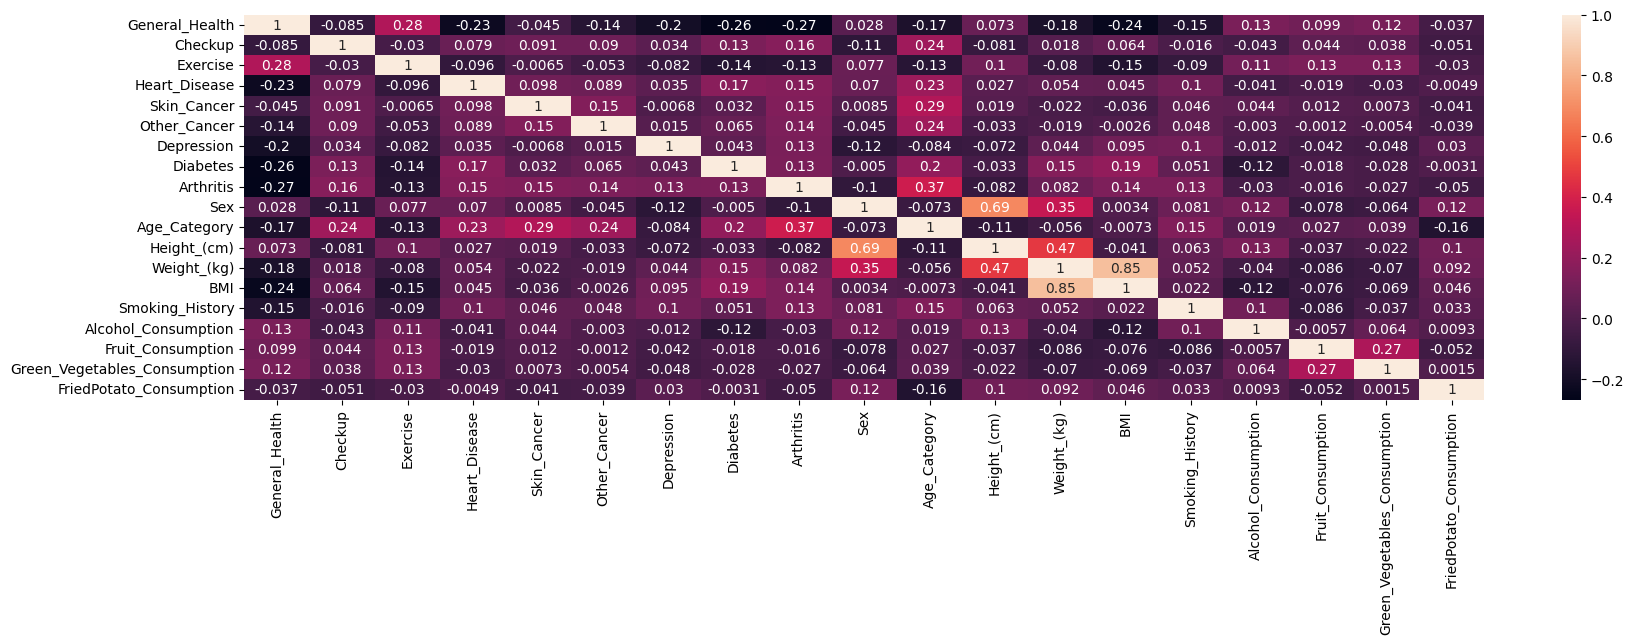

In [51]:
plt.figure(figsize = (20,5))
sns.heatmap(df.corr(),annot = True);

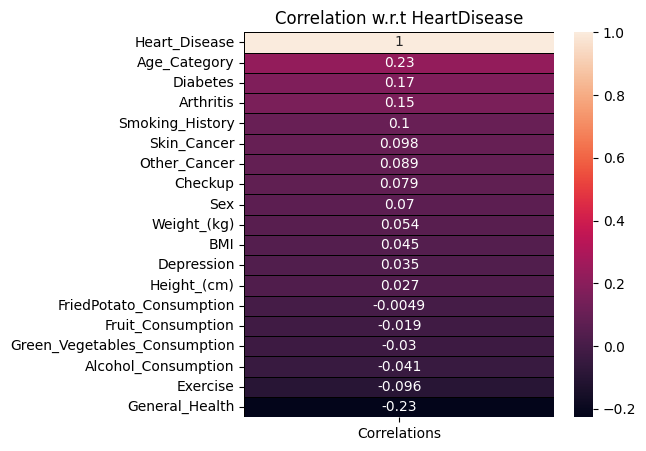

In [52]:
corr = df.corrwith(df['Heart_Disease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

## Feature Selection for Categorical Features :¶


### Chi Squared Test :¶


In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

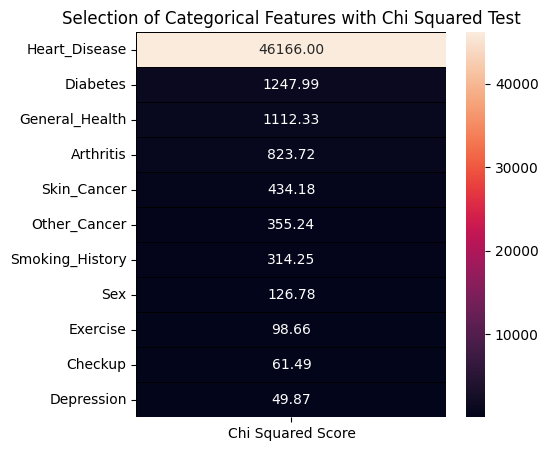

In [54]:
features =df[categorical_features]  
target = df['Heart_Disease']         
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)
featureScores = pd.DataFrame(data=fit.scores_, index=features.columns, columns=['Chi Squared Score'])
plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='Chi Squared Score'), annot=True, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Categorical Features with Chi Squared Test')
plt.show()

### Feature Selection for Numerical Features :¶


ANOVA Test :¶



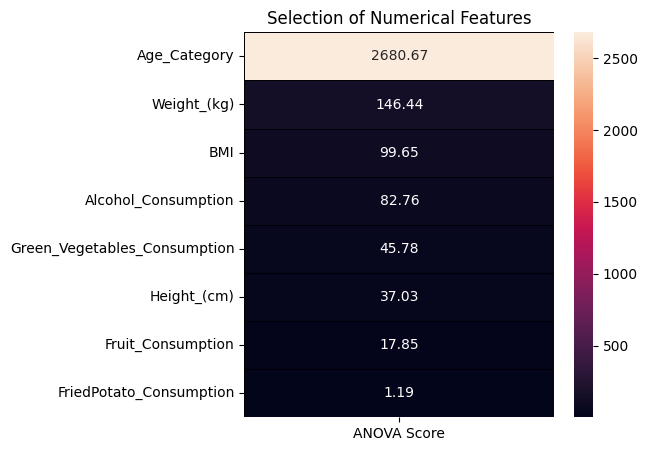

In [55]:
features = df[numerical_features]  
target = df['Heart_Disease']       
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)
featureScores = pd.DataFrame(data=fit.scores_, index=features.columns, columns=['ANOVA Score'])
plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='ANOVA Score'), annot=True, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Numerical Features')
plt.show()


In [56]:
df.to_csv("c:/Users/MSI/MLOps_Project/notebooks/clean_data.csv", index=False)

Based on the feature selection  we will choose the following columns :

In [57]:
df= df[['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
          'Other_Cancer', 'Diabetes', 'Arthritis', 'Sex',
          'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
          'Alcohol_Consumption', 'Fruit_Consumption',
          'Green_Vegetables_Consumption']]


In [58]:

df.shape

(49998, 17)

In [59]:
df.to_csv("c:/Users/MSI/MLOps_Project/notebooks/modeling_data1.csv", index=False)

In [60]:
df["Heart_Disease"].value_counts()


Heart_Disease
0    46166
1     3832
Name: count, dtype: int64

In [61]:
df_majority = df[df["Heart_Disease"] == 0]
df_minority = df[df["Heart_Disease"] == 1]

n_minority = int(len(df_majority) * 0.3 / 0.7)  # 30% minoritaire, 70% majoritaire

# Sur-échantillonner la classe minoritaire
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # Échantillonnage avec remplacement
                                 n_samples=n_minority,
                                 random_state=42)

df_balanced = pd.concat([df_majority, df_minority_upsampled])
print(df_balanced["Heart_Disease"].value_counts(normalize=True))

Heart_Disease
0    0.700005
1    0.299995
Name: proportion, dtype: float64


In [62]:
df_balanced.shape

(65951, 17)

In [63]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65951 entries, 0 to 30897
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   General_Health                65951 non-null  int64  
 1   Checkup                       65951 non-null  int64  
 2   Exercise                      65951 non-null  int64  
 3   Heart_Disease                 65951 non-null  int64  
 4   Skin_Cancer                   65951 non-null  int64  
 5   Other_Cancer                  65951 non-null  int64  
 6   Diabetes                      65951 non-null  int64  
 7   Arthritis                     65951 non-null  int64  
 8   Sex                           65951 non-null  int64  
 9   Age_Category                  65951 non-null  int64  
 10  Height_(cm)                   65951 non-null  float64
 11  Weight_(kg)                   65951 non-null  float64
 12  BMI                           65951 non-null  float64
 13  Smokin

In [64]:
df_balanced.to_csv("c:/Users/MSI/MLOps_Project/notebooks/modeling_data2.csv", index=False)